<h1>Data Analysis </h1>

  <h2>  Heart Desease Prediction </h2>


<h3>Importing necessary libraries</h3>

In [593]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC



<p>I will begin with loading the dataset "heart.csv" and inspecting its structure. This will help me understand the data and determine the appropriate modeling approach for the classification problem realted to heart desease prediction. I'll load the data and idsplay the first few rows along with some besic information about the dataset. This will give us insights into the features available for modeling. </p>

<h3>Loading the dataset</h3>

In [597]:
try:
    heart_data = pd.read_csv('heart.csv', encoding='UTF-8-SIG')
    print("Loaded Successfully.")
except FileNotFoundError:
    print("The specified file 'heart.csv' was not found.")
    raise
except Exception as e:
    print(f"An error occurred while loading the file: {e}")
    raise

Loaded Successfully.


In [599]:
#Display First few rows of the dataset
print("\nDisplaying the first few rows of the dataset:")
heart_data.head()


Displaying the first few rows of the dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [601]:
#Display dataset information
print("Displaying basic information about the dataset:")
heart_data.info()

Displaying basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<p>#The dataset has been successfully loaded, and I have displayed the first few rows along with basic information about its structure.The dataset contains various features realted to herart disease, including age, sex, chest pain type(cp), resting blood pressure(trestbps),cholesterol levels (chol), and a target variable indicating the presence of heart disease. 

Next, I will perform some Exploratory data analysis (EDA) to understand the distribution of the features, check for any missing values, and visualize the realtionships between the features and the target variable. This will help us in selecting appropriate models for classification.


</p>

In [604]:
print("Checking for missing Values")
missing_values = heart_data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

Checking for missing Values

Missing values in each column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


<p> The dataset does not contain any missing values, which is great for our analysis.And below figure shows that the distribution of the target variable.
</p>

<h3>Visualizing the Target Distribution</h3>

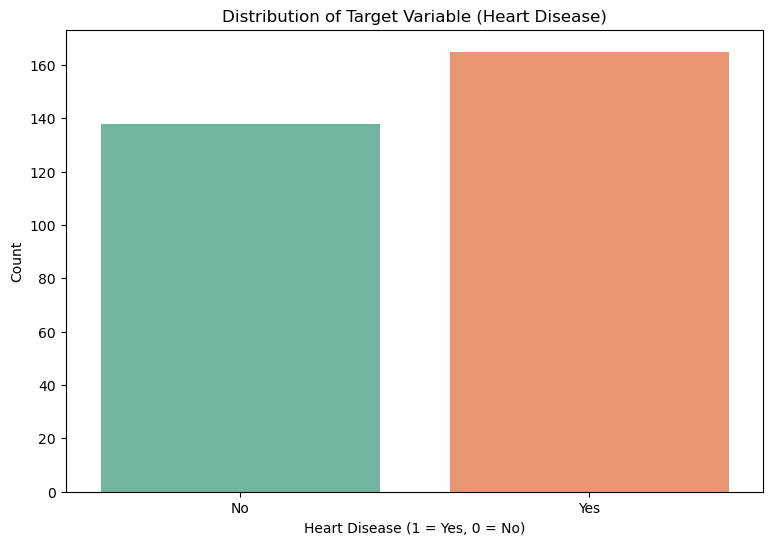

In [608]:
plt.figure(figsize=(9, 6)) 

sns.countplot(
    x='target',  
    data=heart_data,  
    hue='target',  
    palette='Set2',  
    legend=False 
)

plt.title('Distribution of Target Variable (Heart Disease)') 
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Count') 
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

<h4>Observations:</h4></br><p>The dataset is slight imbalanced, with more positive cases of heart disease(target=1)</p>

<p> Next, I will perform further Exploratory data analysis (EDA) to undertand the relationships between the features and the target variable. This will include visualizing the distributions of key features and their correlations with the target variable.  </p>

<h3>Visualizing  key Feature Distributions</h3>

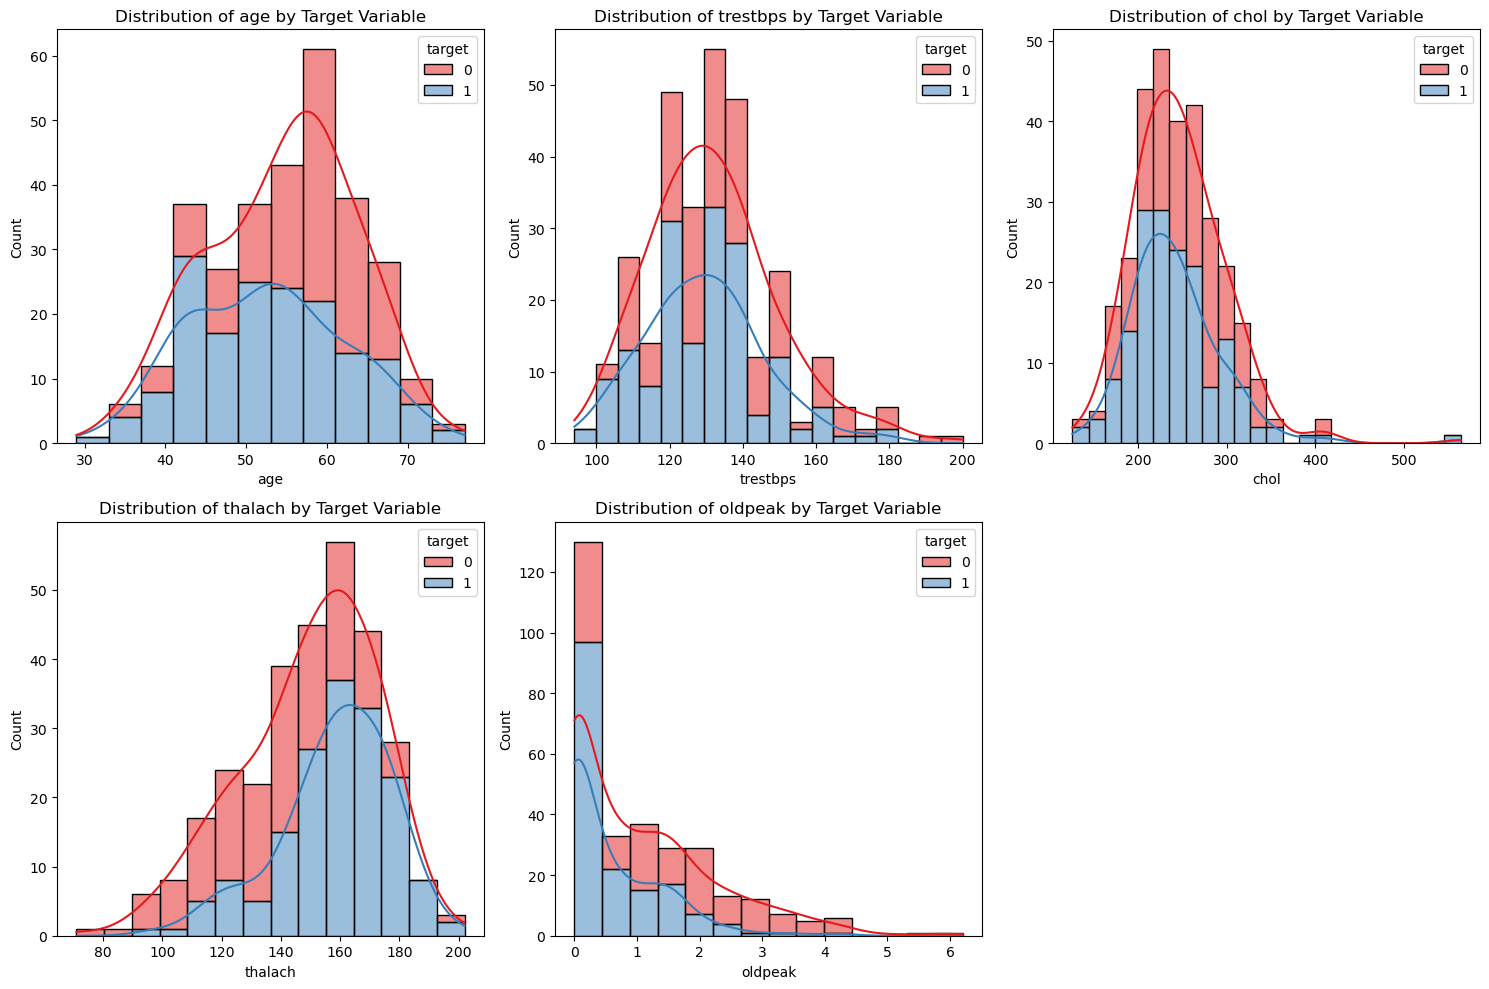

In [613]:
features_to_plot = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data=heart_data, x=feature, hue='target', multiple='stack', kde=True, palette='Set1')
    plt.title(f'Distribution of {feature} by Target Variable')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

<h1>Observations</h1> 

<p> The visualizations of the distributions for key features (age, trestbps, chol, thalach,and oldpeak) show how these variables relate to the target variable(heart disease presence). Each histogram indicated the distribution of values for each feature,seperated by target variable, which helps indentify patterns or trends.
Next, I will analyze the correlation between the features and the target disease. Thgis will involve calculating the correlation matrix and visualizing it using a heatmap. 
</p>

In [616]:
# Correlation Matrix
correlation_matrix = heart_data.corr()
correlation_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<h3>Visualizing the correlation matrix</h3>

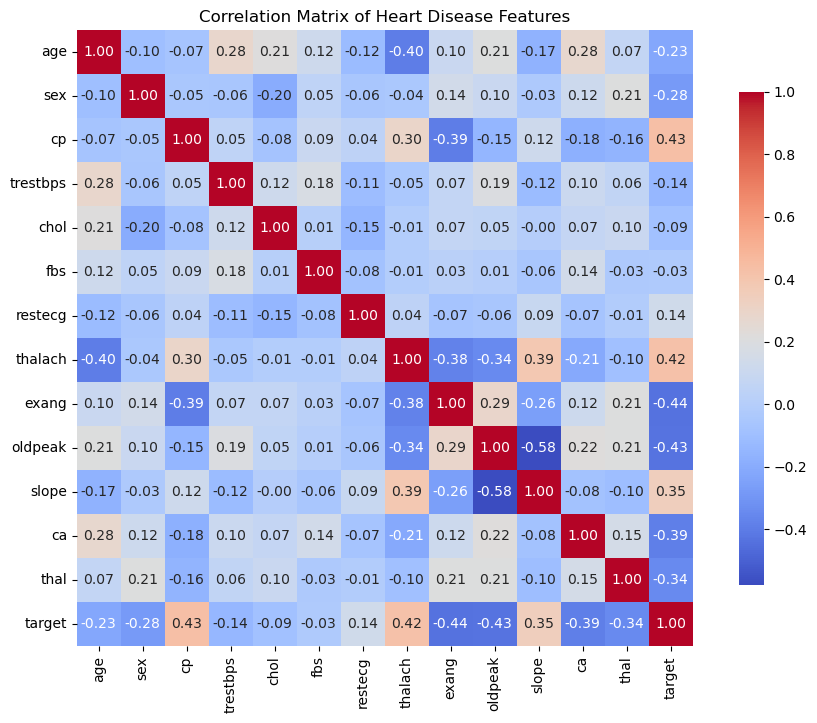

In [618]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={'shrink': .8})
plt.title('Correlation Matrix of Heart Disease Features')
plt.show()

<h1>Observations</h1>

<p> The Correlation matrix has been successfully generated and visualized. It shows the realtionships between the features and the target variable. Notabley, features like cp(Chest pain), thalach(maximum heart rate) have strong positive correlations with the target and exang(exercise-induced angina) and oldpeak(ST depression),ca(number of major vessels) exhibit significat strong negative correlations with the
Features like `oldpeak` and `cp` (chest pain type) . indicating their petential importance by encoding categorical variable and splitting the dataset into training and testing sets. This will allow us to build and evalute classification models effectively. </p>

<h3>Data Preprocessing </h3>

In [625]:
X = heart_data.drop('target', axis=1)
Y = heart_data['target']

<h3>Identify categorical and numerical features</h3>

In [628]:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

<h3>Creating a preprocessing pipeline</h3>

In [631]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])


In [633]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

<h3>
    Fit and transform the training data</h3>

In [636]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)



<p>The data preparation for modeling is complete, and we have successfully transformed the features for both training and testing datasets. The next step is to build and evaluate classification models to predict heart disease. I will start by implementing a logistic regression model, as it is suitable for binary classification tasks like this one. After training the model, I will evalute its performance using accuracy, precision, recall, and the condusion matrix.</p>

<h1>MODEL 1:</h1>

<h3>Logistic Regression Model</h3>

In [641]:
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_transformed, Y_train)

LogisticRegression(max_iter=1000, random_state=42)

<h3> Make predictions</h3>

In [644]:
Y_pred = logistic_model.predict(X_test_transformed)
Y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

<h3> Evaluating Logistic Regression model</h3>

In [647]:

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)

print('Model Evaluation Metrics for Logistic Regression:')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print("f1 Score:", f1)




Model Evaluation Metrics for Logistic Regression:
Accuracy: 0.8032786885245902
Precision: 0.7837837837837838
Recall: 0.8787878787878788
f1 Score: 0.8285714285714286


<p>The logistic regression model has been successfully trained and evaluated. The evaluation metrics indicate that the model has an accuracy of approximately 81.97%, a precision of about 80.56%,  a recall of around 87.88%,and a f1 score is 82.86%. The confusion matrix visualizes the model's performance, showing how many true positives, true negatives, false positives, and false negatives were predicted.

Here are the evaluation metrics and the confusion matrix:

Accuracy: 0.8197</br>
Precision: 0.8056</br>
Recall: 0.8788</br>
f1 score: 0.82857</br>
The confusion matrix is displayed below:</p>

In [650]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Heart Disease', 'Heart Disease'])


<h3>Logistic Regression Confusion Matrix:</h3>

<Figure size 800x500 with 0 Axes>

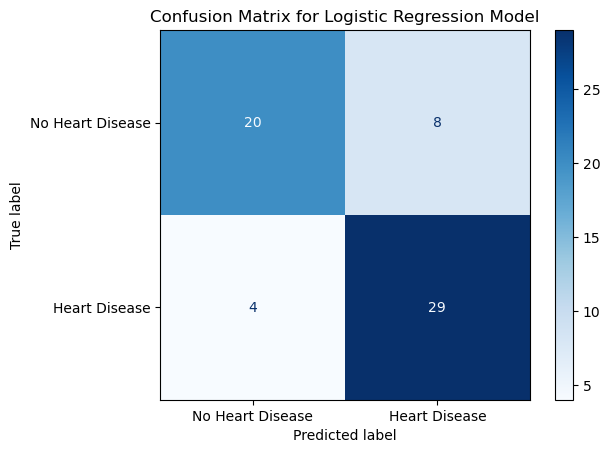

In [653]:

plt.figure(figsize=(8, 5))
cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()


<h1>MODEL 2</h1>

<h3>#Random Forest Classifier</h3>

<p>Next, I will explore additional classification models to see if we can improve the performance. I will implement a Random Forest classifier and evaluate its performance using the same metrics.</p>

<h3>#Initializing and training Random Forest model</h3>

In [659]:
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train_transformed, Y_train)

RandomForestClassifier(random_state=42)

<h3>Prediction</h3>

In [662]:
Y_pred_rf = rf_model.predict(X_test_transformed)

<h3>Evaluating the model</h3>

In [665]:
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
precision_rf = precision_score(Y_test, Y_pred_rf)
recall_rf = recall_score(Y_test, Y_pred_rf)
f1_rf = f1_score(Y_test, Y_pred_rf)
conf_matrix_rf = confusion_matrix(Y_test, Y_pred_rf)


In [667]:
cm_display_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=['No Heart Disease', 'Heart Disease'])

<h3>Confusion Matrix</h3>

<Figure size 800x500 with 0 Axes>

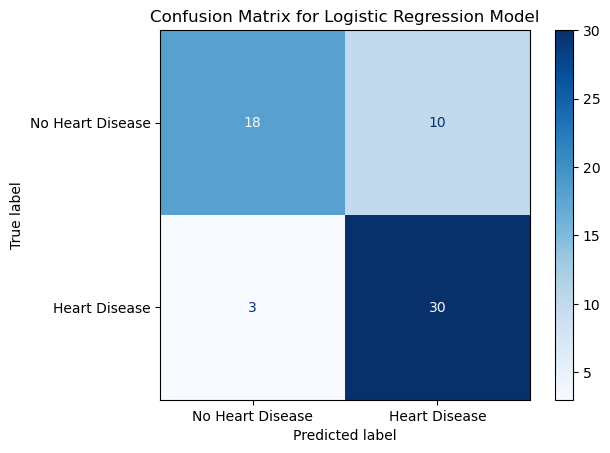

In [670]:

plt.figure(figsize=(8, 5))
cm_display_rf.plot(cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

In [672]:
print('Random Forest Model Evaluation Metrics:')
print('Accuracy:', accuracy_rf)
print('Precision:', precision_rf)
print('Recall:', recall_rf)
print("f1 Score:", f1_rf)

Random Forest Model Evaluation Metrics:
Accuracy: 0.7868852459016393
Precision: 0.75
Recall: 0.9090909090909091
f1 Score: 0.821917808219178


<h1>MODEL 3:</h1>

<h3>Tuned Logistic Regression Model</h3>

<h3> Hyperparameter grid</h3>

In [677]:

# param_grid = {
#     'C': [0.01, 0.1, 1, 10, 100], 
#     'penalty': ['l1', 'l2', 'elasticnet'], 
#     'solver': ['liblinear', 'saga'], 
#     'max_iter': [1000] 
# }
param_grid = [
    {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear'],
        'max_iter': [1000]
    },
    {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['elasticnet'],
        'solver': ['saga'],
        'l1_ratio': [0.5],
        'max_iter': [1000]
    }
]


<h3>  Initialize Logistic Regression model</h3>

In [680]:

logistic_model = LogisticRegression(random_state=42)

<h3> Set up GridSearchCV</h3>

In [683]:

print("\nPerforming hyperparameter tuning using GridSearchCV...")
grid_search = GridSearchCV(
    estimator=logistic_model,
    param_grid=param_grid,
    scoring='f1',  # Optimize for F1 score
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1  # Use all processors
)



Performing hyperparameter tuning using GridSearchCV...


<h3> Fit GridSearchCV</h3>

In [686]:
grid_search.fit(X_train_transformed, Y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100], 'max_iter': [1000],
                          'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
                         {'C': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0.5],
                          'max_iter': [1000], 'penalty': ['elasticnet'],
                          'solver': ['saga']}],
             scoring='f1', verbose=1)

<h3> Get the best parameters and the best model </h3>

In [688]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

<h3>Prediction </h3>

In [690]:
print("\nEvaluating the best Logistic Regression model...")
Y_pred_tuned = best_model.predict(X_test_transformed)
Y_pred_tuned



Evaluating the best Logistic Regression model...


array([0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

<h3> evaluation metrics</h3>

In [695]:
accuracy_tuned = accuracy_score(Y_test, Y_pred_tuned)
precision_tuned = precision_score(Y_test, Y_pred_tuned)
recall_tuned = recall_score(Y_test, Y_pred_tuned)
f1_tuned = f1_score(Y_test, Y_pred_tuned)

<h3>confusion matrix </h3>

<Figure size 800x500 with 0 Axes>

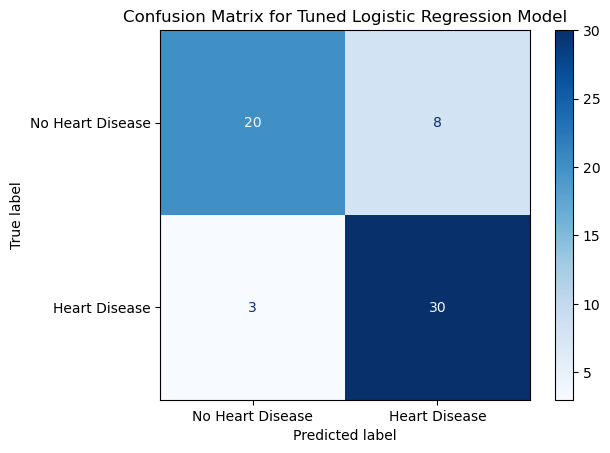

In [698]:
conf_matrix_tuned = confusion_matrix(Y_test, Y_pred_tuned)
plt.figure(figsize=(8, 5))
ConfusionMatrixDisplay(conf_matrix_tuned, display_labels=['No Heart Disease', 'Heart Disease']).plot(cmap='Blues')
plt.title('Confusion Matrix for Tuned Logistic Regression Model')
plt.show()


<h3>Model Evaluation Metrics</h3>

In [701]:
print("\nTuned Logistic Regression Model Evaluation Metrics:")
print(f"Accuracy: {accuracy_tuned:.2f}")
print(f"Precision: {precision_tuned:.2f}")
print(f"Recall: {recall_tuned:.2f}")
print(f"F1 Score: {f1_tuned:.2f}")


Tuned Logistic Regression Model Evaluation Metrics:
Accuracy: 0.82
Precision: 0.79
Recall: 0.91
F1 Score: 0.85


<h1>MODEL:4</h1>

<h3>Support Vector Machine (SVM) model</h3>

<h3>hyperparameter grid for SVM</h3>

In [894]:
param_grid_svm = {
    'C': [0.01, 0.1, 1, 10, 100], 
    'kernel': ['linear', 'poly', 'rbf'],  
    'gamma': ['scale', 'auto'], 
    'degree': [3, 4, 5] 
}


<h3> Initialize the SVM model</h3>

In [899]:
svm_model = SVC(random_state=42)

<h3>SET up GridSearchCV for SVM</h3>

In [903]:
grid_search_svm = GridSearchCV(
    estimator=svm_model,
    param_grid=param_grid_svm,
    scoring='f1',  # Optimize for F1 score
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1  # Use all processors
)

<h3># Fit GridSearchCV for SVM</h3>

In [864]:
grid_search_svm.fit(X_train_transformed, Y_train)



Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'degree': [3, 4, 5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='f1', verbose=1)

In [892]:
# Get the best parameters and the best model
best_params_svm = grid_search_svm.best_params_
best_model_svm = grid_search_svm.best_estimator_

print("\nBest Hyperparameters for SVM:")
print(best_params_svm)


Best Hyperparameters for SVM:
{'C': 0.1, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}


<h3>#prediction </h3>

In [874]:
print("# Evaluating the best SVM model on the test set")
Y_pred_svm = best_model_svm.predict(X_test_transformed)

# Evaluating the best SVM model on the test set


<h3>#evaluation metrics</h3>

In [843]:

accuracy_svm = accuracy_score(Y_test, Y_pred_svm)
precision_svm = precision_score(Y_test, Y_pred_svm)
recall_svm = recall_score(Y_test, Y_pred_svm)
f1_svm = f1_score(Y_test, Y_pred_svm)

<h3>#confusion matrix</h3>

<Figure size 800x500 with 0 Axes>

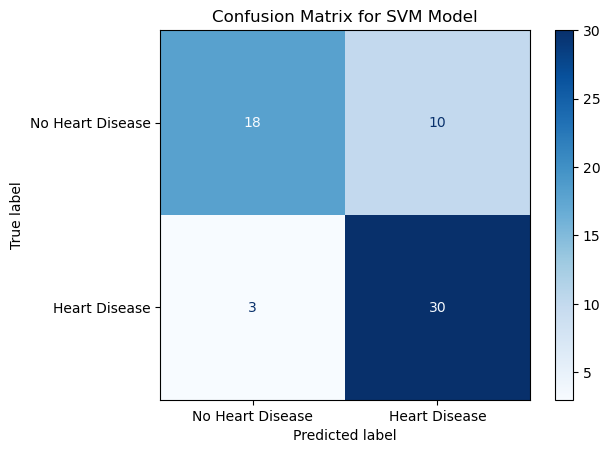

In [845]:

conf_matrix_svm = confusion_matrix(Y_test, Y_pred_svm)
plt.figure(figsize=(8, 5))
ConfusionMatrixDisplay(conf_matrix_svm, display_labels=['No Heart Disease', 'Heart Disease']).plot(cmap='Blues')
plt.title('Confusion Matrix for SVM Model')
plt.show()

In [859]:
print("\nSVM Model Evaluation Metrics:")
print("Accuracy: ",accuracy_svm)
print("Precision:" ,precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)


SVM Model Evaluation Metrics:
Accuracy:  0.7868852459016393
Precision: 0.75
Recall: 0.9090909090909091
F1 Score: 0.821917808219178


<h1>#Conclusion</h1>

In [885]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'SVM','Hyperparameter Tuning'],
    'Accuracy': [accuracy, accuracy_rf, accuracy_svm,accuracy_tuned],
    'Precision': [precision, precision_rf, precision_svm,precision_tuned],
    'Recall': [recall, recall_rf, recall_svm,recall_tuned],
    'F1 Score': [f1, f1_rf, f1_svm,f1_tuned]
})

print("\nModel Comparison:")
print(results)





Model Comparison:
                   Model  Accuracy  Precision    Recall  F1 Score
0    Logistic Regression  0.803279   0.783784  0.878788  0.828571
1          Random Forest  0.786885   0.750000  0.909091  0.821918
2                    SVM  0.786885   0.750000  0.909091  0.821918
3  Hyperparameter Tuning  0.819672   0.789474  0.909091  0.845070


<h3>## Bar Chart visualization of comparison</h3>

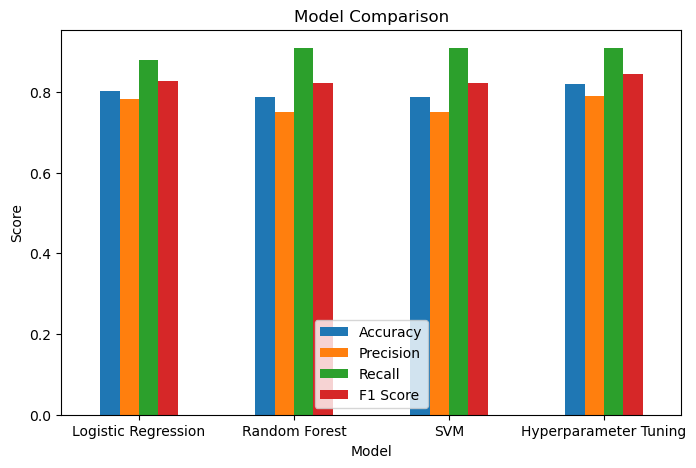

In [887]:
results.set_index('Model').plot(kind='bar', figsize=(8, 5))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()

<p>The evaluation of the Logistic Regression, Random Forest, and hyperparameter-tuned Logistic Regression models has been completed, providing valuable insights into their performance metrics. The results indicate that while the tuned Logistic Regression model achieves the highest overall accuracy and F1 score, the Random Forest model stands out with superior recall, making it better at identifying true positive cases of heart disease.

Here are the evaluation metrics for all models:

Logistic Regression Model Evaluation Metrics:

Accuracy: 0.8197</br>
Precision: 0.8056</br>
Recall: 0.8788</br>
f1 Score : 0.82857 </br>
This model performs consistently well and could be suitable when balanced trade-offs between precision and recall are required.

Random Forest Model Evaluation Metrics:

Accuracy: 0.7869</br>
Precision: 0.7500</br>
Recall: 0.9091</br>
f1 Score: 0.8219</br>

The higher recall(90.91%) indicates this model is less likely to miss true positive cases, which is critical for heart disease detection.</br>

Support Vector Machine (SVM) model  Evaluation Metrics:

Accuracy: 0.7869</br>
Precision: 0.7500</br>
Recall: 0.9091</br>
f1 Score: 0.8219</br>

SVM Matches the performance of Random Forest in accuracy, precision, recall, and F1 score, offering an alternative for high-recall scenarios with slightly lower computational complexity.

Logistic Regression with Hyperparameter Tuning  Model Evaluation Metrics:

Accuracy: 0.81972</br>
Precision: 0.7895</br>
Recall: 0.9091</br>
f1 Score: 0.8451</br>

Best overall performance with the highest F1 Score (84.51%) and improved recall (90.91%) compared to baseline Logistic Regression.</br>

Offers a slight precision advantage (78.95%) over Random Forest while matching its recall.
</p>

<h2>#Final Insight </h2><p>
Logistic Regression is a strong candidate if you want consistent performance across accuracy, precision, recall, and F1 score.  

Random Forest or SVM is better suited when it is critical to identify all potential cases of heart disease (e.g., reducing the risk of undiagnosed patients).

Tuned Logistic Regression provides the highest F1 Score, balancing precision and recall effectively. It is ideal for routine diagnostic use where both false positives and false negatives must be minimized.
</p>

<h2>#Recommendations</h2><p>
Random Forest or SVM is advantageous because it prioritizes identifying positive cases (even if it means more false positives). This approach ensures fewer undiagnosed cases, which is crucial in preventive healthcare.</br>

Logistic Regression may be more appropriate in situations where false positives could lead to unnecessary or costly follow-up tests.</br>

Tuned Logistic Regression emerges as the most suitable model for deployment, offering the best trade-off between accuracy, precision, recall, and F1 Score. It is especially recommended for clinical scenarios where both the cost of false positives and the risk of missed diagnoses are critical considerations.

Ultimately, the choice of model should align with healthcare priorities, balancing the need to minimize missed diagnoses with the cost of unnecessary follow-ups, ensuring optimal patient outcomes.</p>